In [25]:
import numpy as np
import tensorflow
from keras.applications.resnet50 import ResNet50
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os
from keras.applications.resnet50 import ResNet50
from keras.optimizers import Adam
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model
from keras.utils import np_utils
import random
from keras.preprocessing import sequence, image
import matplotlib.pyplot as plt

from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications.vgg16 import decode_predictions
from gensim.models import Word2Vec,KeyedVectors

In [26]:
import matplotlib.image as mpimg

In [27]:
from tensorflow.keras.preprocessing.image import img_to_array

In [28]:
model1 = tensorflow.keras.models.load_model('saved_model.hp5')

In [29]:
def classify():
    global category
    #original = Image.open(image_data)
    original = image.load_img('2.jpeg')
    #original = original.resize((224, 224,3
    original = img_to_array(original)
    original = np.expand_dims(original, axis=0)
    resnet = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),pooling='avg')
    test_img = resnet.predict(original).reshape(2048)
    with open('word_2_indices.pickle', 'rb') as handle:
        word_2_indices_data = pickle.load(handle)
      word_2_indices = word_2_indices_data
    with open('indices_2_word.pickle', 'rb') as handle:
        indices_2_word_data = pickle.load(handle)
    indices_2_word = indices_2_word_data
    max_len = 40
    start_word = ["<start>"]
    while True:
        par_caps = [word_2_indices[i] for i in start_word]
        par_caps = sequence.pad_sequences([par_caps], maxlen=max_len, padding='post')
        preds = model1.predict([np.array([test_img]), np.array(par_caps)])
        word_pred = indices_2_word[np.argmax(preds[0])]
        start_word.append(word_pred)
        
        if word_pred == "<end>" or len(start_word) > max_len:
            break
    label= ' '.join(start_word[1:-1])
    img = mpimg.imread('2.jpeg')
    imgplot = plt.imshow(img)
    plt.show()
    print(str('Caption:') + str(label))


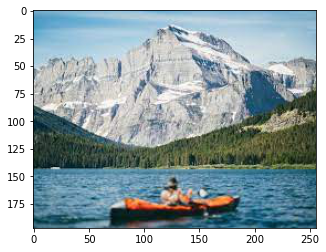

Caption:A man is sitting on a rock face on the tree nearby .


In [30]:
classify()